# **AS events vs X chromosomal escape**


It has been reported that differentially expressed sex-biased genes are likely to be 
linked to escape from X chromosome inactivation (Landscape of X chromosome inactivation across human tissues.
Tukiainen T, et al. Nature. 2017 Oct 11;550(7675):244-248). 

Because of the observed overlap between sex-biased differential expression and AS, we hypothesized that AS e
vents might be more commonly observed in X chromosomal genes that escape inactivation. 

## Retrieve data about X chromosomal escape
This data was extracted from the supplemental material of the Tukiainen paper. Genes are characterized as

1. Escape
2. Inactive
3. Variable
4. Unknown

We examine here the hypothesis that alternatively spliced genes are more likely to escape X inactivation than one would expect
from the X chromosomal average.

In [20]:
xchromgenetable <- read.table(file="../assets/TukiainenSuppFig2extract.tsv", header=FALSE, sep="\t",
                               skipNul=FALSE, stringsAsFactors = FALSE)
colnames(xchromgenetable)  <- c("ENSG.id","symbol","escape.status","par.status")

In [21]:
head(xchromgenetable)

,ENSG.id,symbol,escape.status,par.status
,<chr>,<chr>,<chr>,<chr>
1,ENSG00000000003.10,TSPAN6,Variable,nonPAR
2,ENSG00000000005.5,TNMD,Unknown,nonPAR
3,ENSG00000001497.12,LAS1L,Inactive,nonPAR
4,ENSG00000002586.13,CD99,Escape,PAR
5,ENSG00000003096.9,KLHL13,Inactive,nonPAR
6,ENSG00000004848.6,ARX,Unknown,nonPAR


In [12]:
total_AS_Genes <- read.table(file="../data/Total_AS_by_geneSymbol.tsv", header=TRUE, sep="\t",
                               skipNul=FALSE, stringsAsFactors = FALSE)



In [14]:
head(total_AS_Genes)

,GeneSymbol,n
,<chr>,<int>
1,DDX3X,84
2,KDM5C,40
3,ZFX,21
4,SORBS2,18
5,CD44,16
6,CACNB4,12


In [40]:
sigAsGenes <- sort(total_AS_Genes$GeneSymbol)

In [22]:
XchromGenes <- sort(xchromgenetable$symbol)

## Get lists of escaped/inactive/variable genes

In [33]:
escaped <- sort(xchromgenetable[xchromgenetable$escape.status=='Escape',]$symbol)
message("Escaped X chromomosal genes: ", length(escaped))

Escaped X chromomosal genes: 94



In [34]:
inactive <- sort(xchromgenetable[xchromgenetable$escape.status=='Inactive',]$symbol)
message("Inactive X chromomosal genes: ", length(inactive))

Inactive X chromomosal genes: 408



In [35]:
variable <- sort(xchromgenetable[xchromgenetable$escape.status=='Variable',]$symbol)
message("Variable X chromomosal genes: ", length(variable))

Variable X chromomosal genes: 95



# **Make grouped bar plot**
### First collect the counts of escape/inactive/variable X chromosomal, AS, and DGE genes

In [54]:
# First collect the numbers
as.escape <- intersect(escaped, sigAsGenes)
as.inactive <- intersect(inactive, sigAsGenes)
as.variable <- intersect(variable, sigAsGenes)
as.escape.len <- length(as.escape)
as.inactive.len <- length(as.inactive)
as.variable.len <- length(as.variable)
message("AS escape: ", as.escape.len, " AS inactive: ", as.inactive.len, " AS variable: ", as.variable.len)

AS escape: 16 AS inactive: 34 AS variable: 4



In [55]:
x.escape.len <- length(escaped)
x.inactive.len <- length(inactive)
x.variable.len <- length(variable)
message("X chr escape: ", x.escape.len, " X chr  inactive: ", x.inactive.len, " X chr  variable: ", x.variable.len)

X chr escape: 94 X chr  inactive: 408 X chr  variable: 95



In [56]:
# TODO GET NUMBERS for DGE
dge.escape.len <- 42
dge.inactive.len <- 42
dge.variable.len <- 42

### Transform counts into percentages

In [58]:
as.total <- as.escape.len + as.inactive.len + as.variable.len
as.escape.per <- 100 * as.escape.len/as.total
as.inactive.per <- 100 * as.inactive.len/as.total
as.variable.per <- 100 * as.variable.len/as.total
x.total <- x.escape.len + x.inactive.len + x.variable.len
x.escape.per <- 100 * x.escape.len/x.total
x.inactive.per <- 100 * x.inactive.len/x.total
x.variable.per <- 100 * x.variable.len/x.total
dge.total <- dge.escape.len + dge.inactive.len + dge.variable.len
dge.escape.per <- 100 * dge.escape.len/dge.total
dge.inactive.per <- 100 * dge.inactive.len/dge.total
dge.variable.per <- 100 * dge.variable.len/dge.total
message("AS escape: ", as.escape.per, " AS inactive: ", as.inactive.per, " AS variable: ", as.variable.per)
message("X chr escape: ", x.escape.per, " X chr inactive: ", x.inactive.per, " X chr variable: ", x.variable.per)
message("DGE escape: ", dge.escape.per, " DGE inactive: ", dge.inactive.per, " DGE variable: ", dge.variable.per)

AS escape: 29.6296296296296 AS inactive: 62.962962962963 AS variable: 7.40740740740741

X chr escape: 15.7453936348409 X chr inactive: 68.3417085427136 X chr variable: 15.9128978224456

DGE escape: 33.3333333333333 DGE inactive: 33.3333333333333 DGE variable: 33.3333333333333



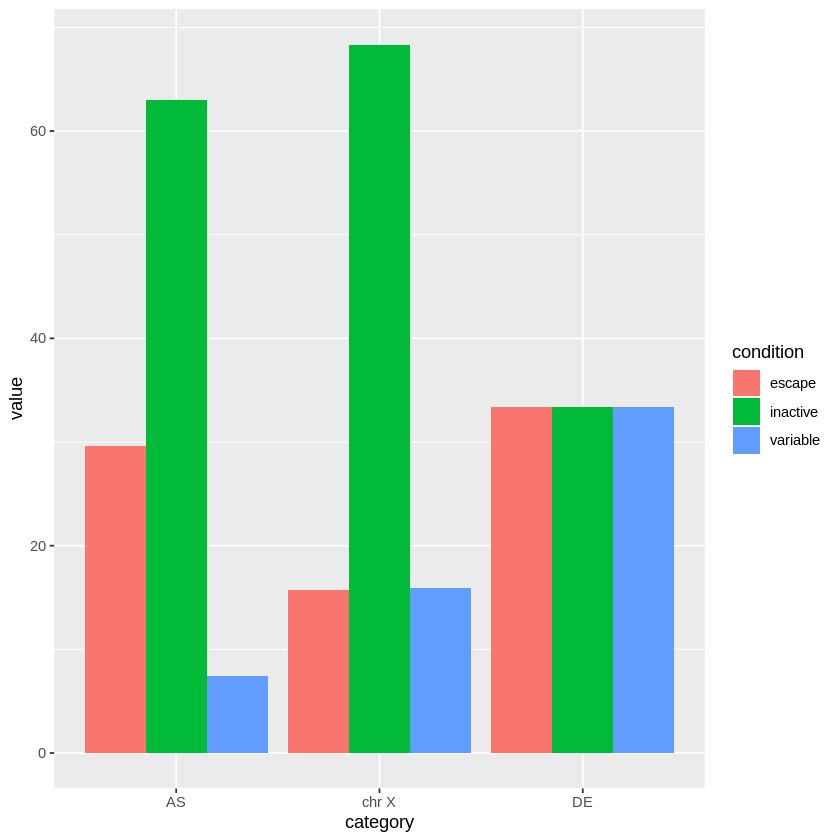

In [59]:
library(ggplot2)
 
# create a dataset
category <- c(rep("AS" , 3) , rep("chr X" , 3) , rep("DE" , 3) )
condition <- rep(c("escape" , "inactive" , "variable") , 3)
value <- c(as.escape.per, as.inactive.per,as.variable.per,x.escape.per, x.inactive.per,x.variable.per,dge.escape.per, dge.inactive.per, dge.variable.per)
data <- data.frame(category,condition,value)
 
# Grouped
ggplot(data, aes(fill=condition, y=value, x=category)) + 
    geom_bar(position="dodge", stat="identity")